In [47]:
# Justin Madsen
# DSC550 / Brett Werner

# import the boys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix

from sklearn import metrics

from sklearn import tree

In [4]:
# https://www.kaggle.com/datasets/teertha/personal-loan-modeling?fbclid=IwAR0NG-bcz38eOqIXnmiYEiASA8CzSaLO0cu95tP-vsxo66GXy3p4VjOkzrA

#
loans_df = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

#### Question
Can we accurately model who will take out personal loans in order to better target advertising to these individuals?

In [5]:
loans_df.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0


In [6]:
# breakout the columns so I can see all the data
loans_df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [9]:
# how much data is there?
loans_df.shape

(5000, 14)

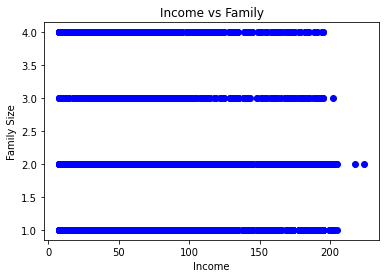

In [11]:
# time for some plotting
fig, ax = plt.subplots()
plt.title("Income vs Family",fontsize=12)
plt.xlabel('Income')
plt.ylabel('Family Size')

# let's do a scatter plot to see how Family Size and Income compares
ax.plot(loans_df['Income'],loans_df['Family'], 'bo')
plt.show()

# these are almost straight lines. This leads me to think that there's /almost/ no correlation between family size
# and income. However, I do notice that the smaller family sizes have a higher maximum income. This could be due to
# having more time available to learn skills or work more shifts. Could also be nothing though.

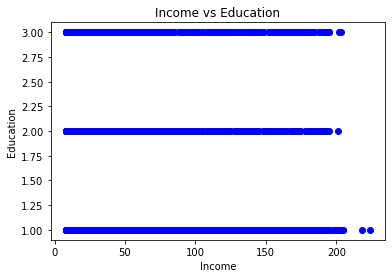

In [14]:
# time for some plotting
fig, ax = plt.subplots()
plt.title("Income vs Education",fontsize=12)
plt.xlabel('Income')
plt.ylabel('Education')

# let's do a scatter plot to see how Education and Income compares
ax.plot(loans_df['Income'],loans_df['Education'], 'bo')
plt.show()

# these are almost straight lines again. This leads me to think that there's /almost/ no correlation between
# education and income. However, I do notice that the lower education levels have a higher maximum income. This
# could be due to having more years in the work force, improving their resume and their incomes as well.

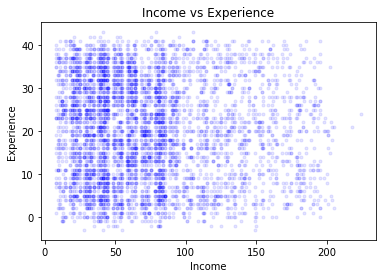

In [19]:
# time for some plotting
fig, ax = plt.subplots()
plt.title("Income vs Experience",fontsize=12)
plt.xlabel('Income')
plt.ylabel('Experience')

# let's do a scatter plot to see how Experience and Income compares
ax.plot(loans_df['Income'],loans_df['Experience'], 'bo', markersize=3, alpha=0.1)
plt.show()

# here we actually see a significant clump in the sub 100K income, regardless of experience. Also, we see a big
# drop in income around 130-150K, with the overall experience having no tangible impact on income. If I had to
# guess, I would think this is a generational insight. Older generations value loyalty to a single company for a
# long period of time, while the younger generations move between companies every 2-3 years. Studies have shown
# that staying with one company for a long time nets you less in raises over time than moving from job to job,
# so seeing the high experienced workers with a smaller income isn't too surprising here.

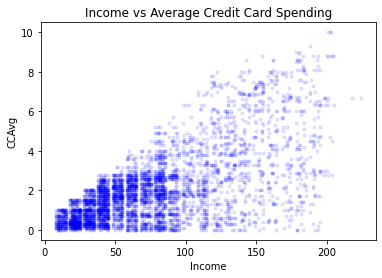

In [24]:
# time for some plotting
fig, ax = plt.subplots()
plt.title("Income vs Average Credit Card Spending",fontsize=12)
plt.xlabel('Income')
plt.ylabel('CCAvg')

# let's do a scatter plot to see how Credit Card Spending and Income compares
ax.plot(loans_df['Income'],loans_df['CCAvg'], 'bo', markersize=3, alpha=0.1)
plt.show()

# not surprisingly, we see a significant increase in Credit Card SPending as incomes increase. First, the large
# clump at the bottom end makes sense. People with low incomes may rely on credit cards to make ends meet if they
# have a bad month and can't afford the necessities. On the top end, those with higher incomes may feel like they
# can afford to spend more on credit cards every month, because "Oh I make enough money to cover it".

In [8]:
## Milestone 2
# is there any missing data?
loans_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [25]:
# ID doesn't do anything here other than provide another identifier for the data
loans_df = loans_df.drop('ID', axis = 1)

In [27]:
# there is no missing data, so filling data isn't necessary

In [29]:
# let's get the dummies and set the variables for the test up

x = pd.get_dummies(loans_df.drop('Personal Loan', axis = 1), drop_first = True)
y = loans_df['Personal Loan']

In [30]:
# Taking the above X,Y - create a train and test set. train_test_split() takes the X,Y and the test_size argument
# determines how much of that data is test vs train. In this scenario, we only want 20% test data to be used 
# for modeling.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [32]:
## Milestone 3
# Since we're looking for a yes/no decision, I am inclined to think that a decision tree is appropriate for this
# data set.

# let's create the tree
decisiontree = DecisionTreeClassifier(random_state=9001)

In [33]:
# let's build the model
tree_model = decisiontree.fit(x_train, y_train)

In [34]:
# let's get some predictions going
y_pred = tree_model.predict(x_test)

In [42]:
tree_confusion = confusion_matrix(y_test, y_pred)
tree_confusion

array([[893,  10],
       [ 10,  87]])

In [45]:
print(metrics.classification_report(y_test, y_pred))
# here we can see that the model is about 98% accurate. It's more accurate when predicting someone won't 
# accept the personal loan, however that is expected since most people didn't accept the loan. This provides
# more data to create the model off of.

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       903
           1       0.90      0.90      0.90        97

    accuracy                           0.98      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.98      0.98      0.98      1000



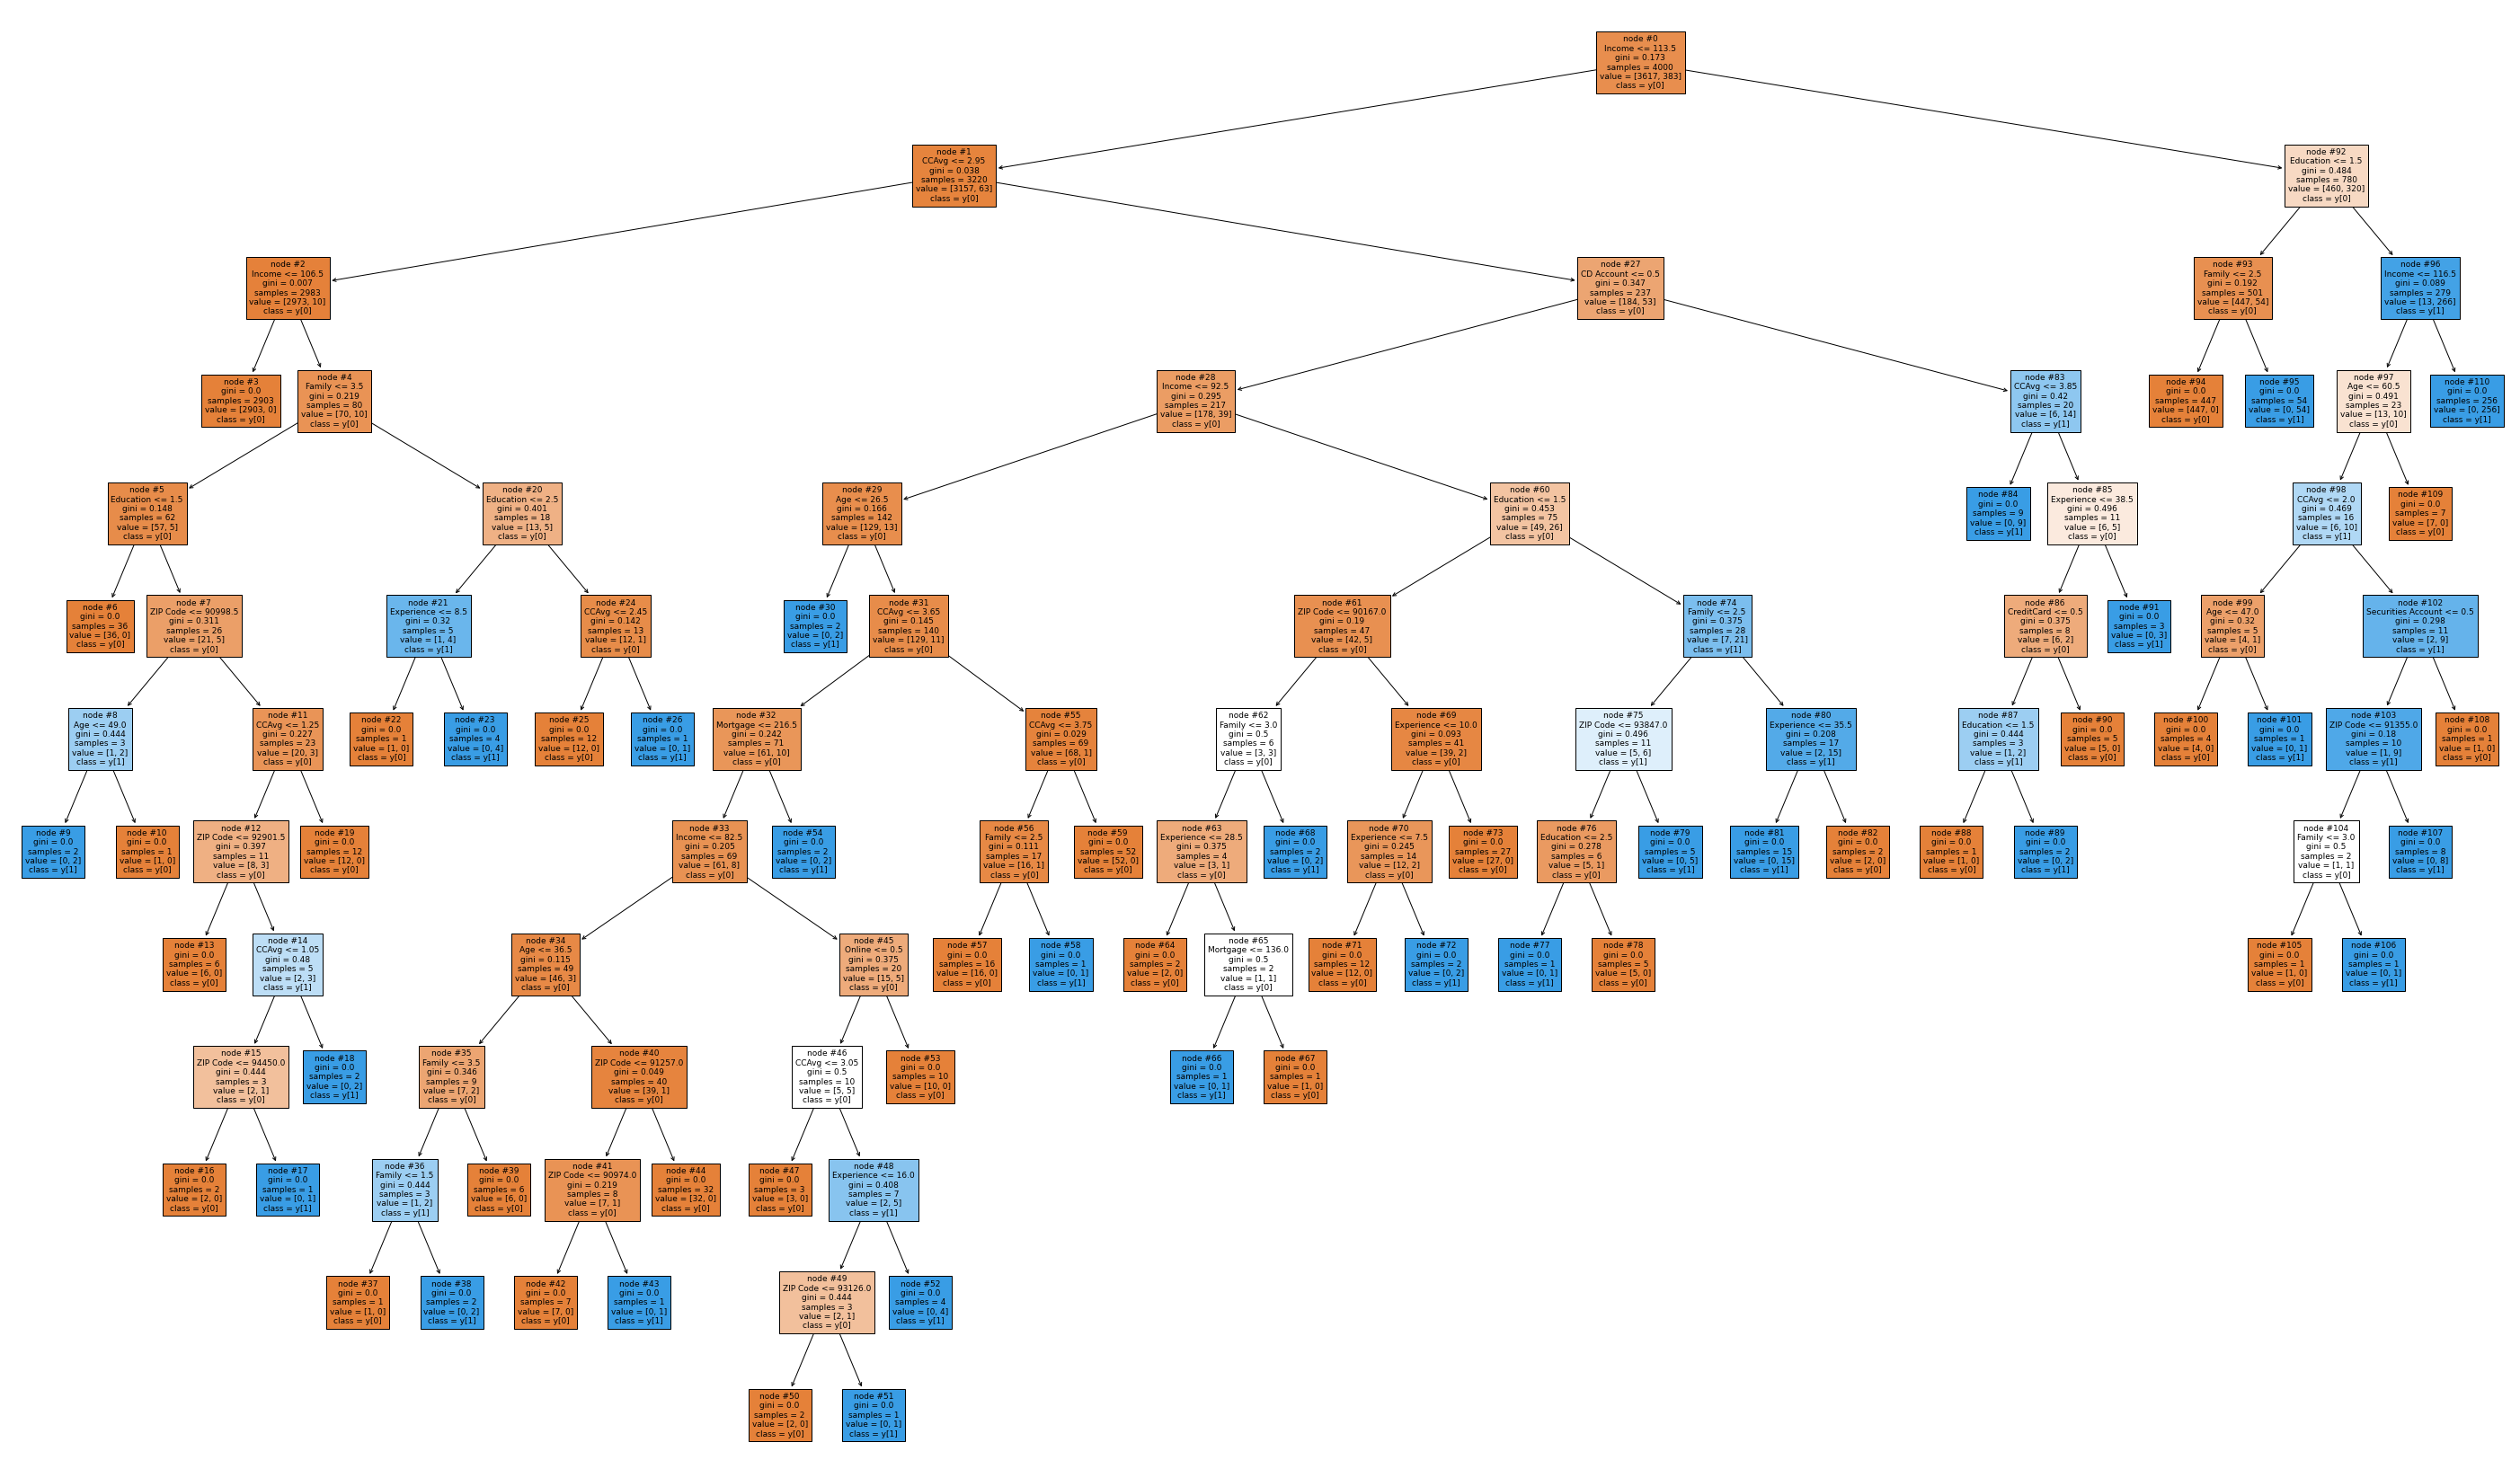

In [60]:
# let's do the plotting
plt.figure(figsize=(50,30))
graph_tree = tree.plot_tree(tree_model,feature_names=x_test.columns,filled=True,fontsize=9,
                            node_ids=True,class_names=True)
for out in graph_tree:
     arrow = out.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# With this model being 98% accurate, I'm wondering if this data is overfit a bit. I may need to reattack the 
# high variance modules to get a better understanding of how to do that process, then restrict the data to only
# the variables that affect the variance. I wonder if I should also tackle outliers. I feel like some outliers are
# valuable information, but I would need to determine what criteria to base that off of.